# TODO

* pridat title pre grafy pri kategorickych atributoch?
* TSH normalna hodnota u deti je do 67, u dospelych do cca 5, co s hodnotami nad sto? => napisat do problemov

František Šefčík a Vajk Pomichal, IAU, zimný semester 2018

# Projekt 1

**dataset 31**

### Načítanie potrebných kniníc

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.api as sms
import scipy.stats as stats
import json

### Načítanie dát

In [3]:
other_train = pd.read_csv('31/other_train.csv')
other_valid = pd.read_csv('31/other_valid.csv')

personal_train = pd.read_csv('31/personal_train.csv')
personal_valid = pd.read_csv('31/personal_valid.csv')

## Prvý pohľad na dáta

In [134]:
pd.options.display.max_columns = None

plt.rcParams['figure.figsize'] = (10,8)

In [5]:
other_train.head()

,Unnamed: 0,name,address,query hyperthyroid,FTI measured,education,lithium,TT4,T4U,capital-loss,capital-gain,tumor,TSH,T3,fnlwgt,hours-per-week,relationship,sick,workclass,TT4 measured,class,marital-status,goitre,native-country,hypopituitary,medical_info,on antithyroid medication,referral source,education-num,occupation,TBG measured,TBG,race,FTI
0,0,Christine Tanner,"340 Moon Freeway\nTamarafort, MO 35449",f,t,HS-grad,f,84.0,0.87,0.0,0.0,f,0.2,1.6,127573.0,38.0,Not-in-family,f,Private,t,negative.|165,Separated,f,United-States,f,"{'query hypothyroid':'f','T4U measured':'t','p...",f,SVI,9.0,Adm-clerical,f,?,White,97
1,1,Cynthia Raio,"446 Lynch Prairie Apt. 742\nKristineshire, CO ...",f,t,HS-grad,f,128.0,1.14,0.0,0.0,f,3.0,2.3,103218.0,40.0,Unmarried,f,Private,t,negative.|2191,Divorced,f,United-States,f,"{'query hypothyroid':'f','T4U measured':'t','p...",f,other,9.0,Adm-clerical,f,?,Black,112
2,2,Jason Muller,"198 Garcia Stravenue Apt. 769\nEast Shawnview,...",f,t,HS-grad,f,114.0,1.02,0.0,0.0,f,1.9,1.8,134181.0,50.0,Other-relative,f,Local-gov,t,negative.|1019,Never-married,f,United-States,f,"{'query hypothyroid':'f','T4U measured':'t','p...",f,SVHC,9.0,Handlers-cleaners,f,?,White,112
3,3,Sharon Tomassi,"1695 Judy Burg\nEast Kurtland, MI 54744",f,t,Some-college,f,91.0,1.16,0.0,3418.0,f,8.5,2.1,195914.0,30.0,Own_child,f,Private,t,negative.|1061,Never-married,f,United-States,f,"{'query hypothyroid':'f','T4U measured':'t','p...",f,other,10.0,Sales,f,?,Black,79
4,4,Christopher Sells,Unit 5029 Box 6752\nDPO AE 90819,f,t,HS-grad,f,83.0,0.82,0.0,0.0,f,6.2,1.2,121135.0,40.0,Husband,f,?,t,Negative.|1173,Married-civ-spouse,f,United-States,f,"{'query hypothyroid':'f','T4U measured':'t','p...",f,SVI,9.0,?,f,?,White,101


In [6]:
personal_train.head()

,Unnamed: 0,name,address,age,sex,date_of_birth
0,0,Edith Boudreaux,"11818 Lori Crossing Apt. 802\nPughstad, DC 78165",49.0,F,69-04-28
1,1,Janet Washington,"PSC 4657, Box 5446\nAPO AP 58412",78.0,F,1940-01-23
2,2,Margaret Chabot,Unit 9759 Box 9470\nDPO AP 45549,65.0,F,1953-06-23
3,3,Terry Terry,"137 Lewis Flat Suite 762\nWest Elizabeth, AL 3...",34.0,M,1984-03-08
4,4,Stephen Lalk,"995 Frank Stravenue\nSouth Matthewport, TX 81402",57.0,M,1961-09-16


In [7]:
print('Pocet riadkov (other_train):',other_train.shape[0])
print('Pocet riadkov (personal_train):',personal_train.shape[0])

Pocet riadkov (other_train): 2287
Pocet riadkov (personal_train): 2237


Dataset s osobnymi udajmi obsahuje menej riadkov, co pravdepodobne znamena, ze niektori ludia maju viacere merania v ramci datasetu other

##  Prieskumná analýza

### Opis dát a ich charakteristiky

#### dataset 'other'

In [8]:
other_train.describe(include='all')

,Unnamed: 0,name,address,query hyperthyroid,FTI measured,education,lithium,TT4,T4U,capital-loss,capital-gain,tumor,TSH,T3,fnlwgt,hours-per-week,relationship,sick,workclass,TT4 measured,class,marital-status,goitre,native-country,hypopituitary,medical_info,on antithyroid medication,referral source,education-num,occupation,TBG measured,TBG,race,FTI
count,2287.000000,2287,2287,2275,2280,2280,2280,1985,2044.000000,2273.000000,2.281000e+03,2272,2041.000000,1795.000000,2.282000e+03,2278.000000,2273,2277,2273,2276,2274,2278,2280,2270,2282,2282,2277,2275,2049.000000,2280,2282,2278,2278,2276
unique,NaN,2236,2237,3,3,16,3,201,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,9,3,8,3,2237,6,3,37,2,63,6,5,NaN,14,2,1,5,199
top,NaN,Renee Henderson,"355 Cynthia Lakes\nWest Reginald, MO 65366",f,t,HS-grad,f,??,NaN,NaN,NaN,f,NaN,NaN,NaN,NaN,Not-in-family,f,Private,t,increased binding protein.|1675,Never-married,f,United-States,f,"{'query hypothyroid':'f','T4U measured':'t','p...",f,other,NaN,Adm-clerical,f,?,White,?
freq,NaN,3,3,2136,2044,749,2268,76,NaN,NaN,NaN,2217,NaN,NaN,NaN,NaN,628,2187,1601,2125,2,892,2256,2040,2281,1267,2022,1325,NaN,402,2281,2278,1897,235
mean,1143.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.995457,83.845139,5.265726e+03,NaN,4.456781,2.023175,1.882513e+05,38.777436,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.964861,NaN,NaN,NaN,NaN,NaN
std,660.344355,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.191836,397.416653,2.226147e+05,NaN,20.154550,0.813347,1.092634e+05,12.521955,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.462162,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.310000,0.000000,-1.502400e+06,NaN,0.005000,0.050000,2.030800e+04,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
25%,571.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.880000,0.000000,0.000000e+00,NaN,0.440000,1.600000,1.179322e+05,35.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN
50%,1143.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.980000,0.000000,0.000000e+00,NaN,1.400000,2.000000,1.771505e+05,40.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN
75%,1714.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.080000,0.000000,0.000000e+00,NaN,2.600000,2.400000,2.319945e+05,40.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.000000,NaN,NaN,NaN,NaN,NaN


In [9]:
other_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2287 entries, 0 to 2286
Data columns (total 34 columns):
Unnamed: 0                   2287 non-null int64
name                         2287 non-null object
address                      2287 non-null object
query hyperthyroid           2275 non-null object
FTI measured                 2280 non-null object
education                    2280 non-null object
lithium                      2280 non-null object
TT4                          1985 non-null object
T4U                          2044 non-null float64
capital-loss                 2273 non-null float64
capital-gain                 2281 non-null float64
tumor                        2272 non-null object
TSH                          2041 non-null float64
T3                           1795 non-null float64
fnlwgt                       2282 non-null float64
hours-per-week               2278 non-null float64
relationship                 2273 non-null object
sick                         2277 non

Ukazalo sa, ze niektore ociviedne ciselne atributy (napriklad TT4) sa beru ako object, kvoli analyze bude potrebna ich prevod na cisla

Z prveho pohladu na data vidime, ze viacere stlpce obsahuju len true-false hodnoty (alebo Nan): 'query hyperthyroid', 'FTI measured', 'lithium', 'tumor', 'sick', 'TT4 measured', 'goitre', 'hypopituitary', 'TBG measured'. Aj stlpec 'on antithyroid medication' sa javi akoby obsahoval hodnoty true-false.

Atributy, ktore obsahuju v nazve slovo measured hovoria len o tom ci bola jemu prislusna hodnota merana na danom pacientovi. Tieto atributy nam neposkytuju ziadnu pridanu informaciu, pretoze uz z konkretnych meranych atributov vieme zistit, ktore neboli merane. Naopak, stlpce tumor alebo sick mozu obsahovat uzitocnu informaciu. 
Hodnoty v tychto stlpcov zjednotime, aby obsahovali len hodnoty 't', 'f' a pripadne aj nan

#### dataset 'personal'

In [10]:
personal_train.describe(include='all')

,Unnamed: 0,name,address,age,sex,date_of_birth
count,2237.000000,2237,2237,2236.000000,2237,2236
unique,NaN,2236,2237,NaN,3,2186
top,NaN,Terry Murphy,"2590 Lopez Road Suite 175\nCindyhaven, WY 31361",NaN,F,1984-08-14
freq,NaN,2,1,NaN,1448,3
mean,1118.000000,NaN,NaN,51.822004,NaN,NaN
std,645.910598,NaN,NaN,20.884439,NaN,NaN
min,0.000000,NaN,NaN,1.000000,NaN,NaN
25%,559.000000,NaN,NaN,36.000000,NaN,NaN
50%,1118.000000,NaN,NaN,54.000000,NaN,NaN
75%,1677.000000,NaN,NaN,67.000000,NaN,NaN


In [11]:
personal_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2237 entries, 0 to 2236
Data columns (total 6 columns):
Unnamed: 0       2237 non-null int64
name             2237 non-null object
address          2237 non-null object
age              2236 non-null float64
sex              2237 non-null object
date_of_birth    2236 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 104.9+ KB


Dataset s osobnymi udajmi obsahuje textove atributy 'name' a 'address', ciselny atribut 'age', kategoricky atribut 'sex', a datum narodenia 'date_of_birth'.

Na prvy pohlad vidime, ze stlpec 'age' obsahuje extremne vysoky maximum 455 rokov, co moze znamenat napriklad preklep, ale na rozhodnutie potrebujeme blizsi pohlad na data.

Vsetky mena su skoro unikatne (len Terry Murphy sa vyskytuje dvakrat), a kazda adresa je unikatna. Tato informacia moze pomoct pri spajani tabuliek.

#### **uprava stlpcov s true/false hodnotami**

In [12]:
true_false_cols = ['on antithyroid medication','query hyperthyroid','FTI measured',
                   'lithium','tumor','sick','TT4 measured','goitre','hypopituitary',
                   'TBG measured']

In [13]:
for v in true_false_cols:
    print(v + ": " + str(other_train[v].unique()))

on antithyroid medication: ['f' 'FALSE' 'TRUE' 'F' 't' nan 'f.2']
query hyperthyroid: ['f' 't' nan 'f.8']
FTI measured: ['t' 'f' nan 't.4']
lithium: ['f' 't' nan 'f.9']
tumor: ['f' 't' nan 'f.11']
sick: ['f' nan 't' 'f.3']
TT4 measured: ['t' 'f' nan 't.2']
goitre: ['f' nan 't' 'f.10']
hypopituitary: ['f' nan 'f.12']
TBG measured: ['f' nan 'f.14']


Tieto hodnoty treba zredukovat na hodnoty true, false a Nan.

In [14]:
def set_true_false(df,column):
    df[column] = df[column].map(lambda x: 'f' if 'f' in x.lower() else 't', na_action='ignore')

In [15]:
for c in true_false_cols:
    set_true_false(other_train,c)

### Podiel chybajucich hodnot v jednotlivych stlpcoch

#### dataset 'other'

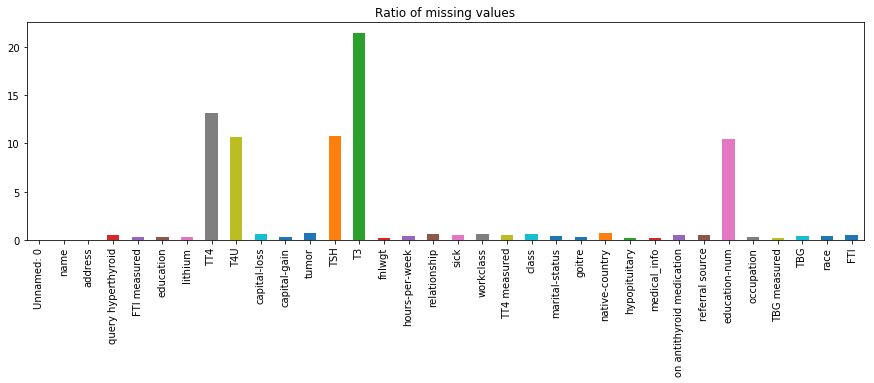

In [16]:
plt.figure(figsize=(15,4))
other_train.isna().sum().map(lambda x: (x / other_train.shape[0])* 100).plot(kind='bar',title = 'Ratio of missing values')

Na prvy pohlad pri vacsine atributov je malo chybajucich hodnot, ale pri atribute T3 uz chyba viac ako 20%, preto nebude mat taku vypovednu hodnotu. Pri viacerych atributoch su chybajuce hodnoty znacene inym sposobom (napriklad '???'), preto tento prvy pohlad pravdepodobne nie je presny

#### dataset 'personal'

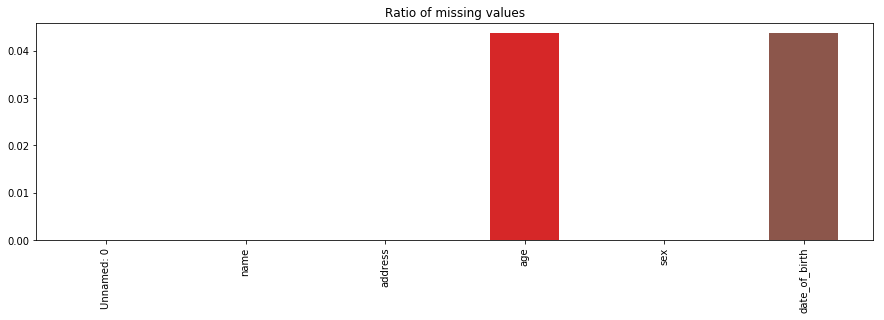

In [17]:
plt.figure(figsize=(15,4))
personal_train.isna().sum().map(lambda x: (x / other_train.shape[0])* 100).plot(kind='bar',
                                                                                title = 'Ratio of missing values')

Dataset personal obsahuje na prvy pohlad velmi malo chybajucich hodnot

### Pohľad na atribut class (dataset 'other')

Atribut class obsahuje udaje o tom, ci dany pacient mal negativne vysledky, alebo je chory, tento atribut chceme v buducnosti predikovat, preto je dolezite ju analyzovat

Pocet uniktnych hodnot:

In [18]:
other_train['class'].unique().shape[0]

2238

In [19]:
other_train['class'].head()

0     negative.|165
1    negative.|2191
2    negative.|1019
3    negative.|1061
4    Negative.|1173
Name: class, dtype: object

Predikovany atribut "class" potrebujeme upravit na tri kategorie a to negative, increased (binding protein) a decreased (binding protein), podla stavu pacienta 

In [20]:
other_train['class'].unique()

array(['negative.|165', 'negative.|2191', 'negative.|1019', ...,
       'increased binding protein.|1018', 'Negative.|2378',
       'increased binding protein.|882'], dtype=object)

In [21]:
def findPatternChange(df,column, new_column, source, target):
    sample = df[column].str.contains(source, na=False, regex=False, case=False)
    df.loc[sample, new_column] = target
    return df

In [22]:
analz_data = findPatternChange(other_train,'class','new_class','negative','negative')
analz_data = findPatternChange(analz_data,'class','new_class','increased','increased')
analz_data = findPatternChange(analz_data,'class','new_class','decreased','decreased')

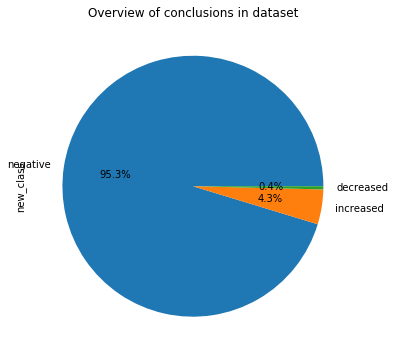

In [23]:
analz_data['new_class'].value_counts().plot.pie(autopct='%1.1f%%', title = "Overview of conclusions in dataset")

Vacsina sledovanych ludi ma zaver 'negative', male percento ma zaznamenane zmeny v organizme, tento rozdiel moze sposobovat nepresnosti pri analyze, s ktorym treba pocitat

### Numericke atributy
OTHER: Unnamed: 0, TT4, T4U, capital-loss, capital-gain, TSH, T3, fnlwgt, education-num, FTI

PERSONAL: age

Funkcia, ktora zobrazi zakladny pohlad na data (uz v zavislosti od stavu pacienta):

In [24]:
def analyze_numeric(df, column):
    print(df[column].describe())
    sns.distplot(df[df['new_class'] == 'increased'][column].dropna(), kde_kws={"color": "b", "lw": 3, "label": "increased"})
    sns.distplot(df[df['new_class'] == 'decreased'][column].dropna(), kde_kws={"color": "g", "lw": 3, "label": "decreased"})
    sns.distplot(df[df['new_class'] == 'negative'][column].dropna(), kde_kws={"color": "r", "lw": 3, "label": "negative"},)
    box_plot = df.boxplot(column=column, by='new_class')
    

#### Unnamed: 0

In [25]:
other_train['Unnamed: 0'].head()

0    0
1    1
2    2
3    3
4    4
Name: Unnamed: 0, dtype: int64

Tento atribut obsahuje len indexy, v pohladu analyzi nie je zaujimavy

#### TT4

In [26]:
other_train.TT4.head()

0     84.0
1    128.0
2    114.0
3     91.0
4     83.0
Name: TT4, dtype: object

Tento atribut sa javi, ako ciselny, ale je ulozeny, ako object, preto ho pretypujeme na numericku hodnotu.

In [27]:
other_train['TT4'] = pd.to_numeric(other_train.TT4, errors='coerce')

In [28]:
other_train.TT4.head()

0     84.0
1    128.0
2    114.0
3     91.0
4     83.0
Name: TT4, dtype: float64

count    1909.000000
mean      109.077737
std        35.544961
min         2.000000
25%        88.000000
50%       104.000000
75%       125.000000
max       430.000000
Name: TT4, dtype: float64


/home/vajk/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/vajk/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/vajk/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


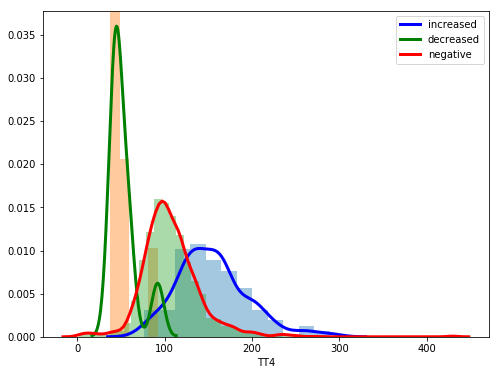

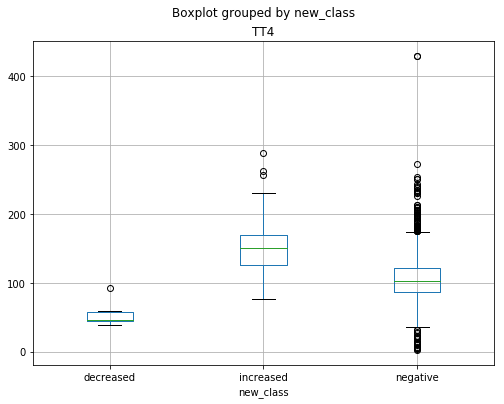

In [29]:
analyze_numeric(other_train,'TT4')

Z grafov vyplyva, na zaklade tohto atributu sa daju najst rozdiely medzi negativnymi a medzi ludmi so zmenenou hodnotou proteinov. Boxplot ukazuje, ze ludia s negativnym vysledkom sa nachadzaju aj v rozsahu, kde su ludia s naznakom choroby, preto tento atribut samostatne nie je dostatocne dobry identifikator choroby

#### T4U

In [30]:
other_train.T4U.head()

0    0.87
1    1.14
2    1.02
3    1.16
4    0.82
Name: T4U, dtype: float64

count    2044.000000
mean        0.995457
std         0.191836
min         0.310000
25%         0.880000
50%         0.980000
75%         1.080000
max         2.120000
Name: T4U, dtype: float64


/home/vajk/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/vajk/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/vajk/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


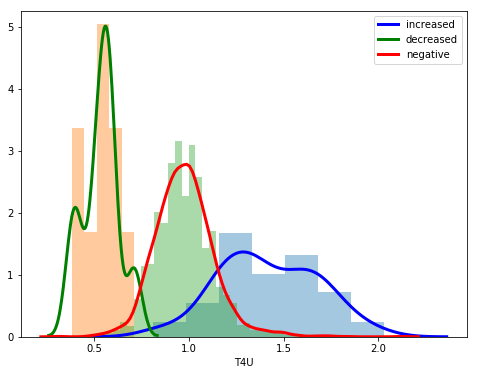

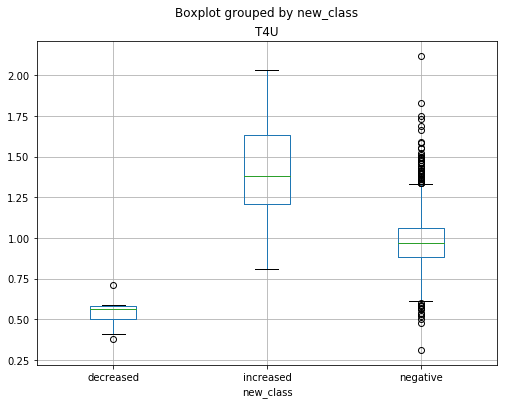

In [31]:
analyze_numeric(other_train,'T4U')

Atribut ma podobne vlastnosti, ako TT4. Zvýšená hodnota T4U sa javí ako increased zatiaľ čo nízka pripadá decreased pripadom. Atribút je vhodny na stanovenie a overenie hypotezy, či je rozdiel medzi negative a jednym z pripadov choroby signifikantny. 

#### capital-loss

In [32]:
other_train['capital-loss'].value_counts().head(15)

0.0       2170
1977.0      12
1902.0       8
1602.0       7
1740.0       6
1721.0       4
1887.0       4
1741.0       4
1762.0       3
1590.0       3
1564.0       3
2339.0       3
1485.0       3
625.0        3
1719.0       2
Name: capital-loss, dtype: int64

Vacsina hodnot je 0, atribut samostatne pravdepodobne nema velku vypovednu hodnotu

#### capital-gain

In [33]:
other_train['capital-gain'].value_counts().head(15)

0.0        2117
7298.0       13
15024.0      13
7688.0        8
8614.0        7
4650.0        6
99999.0       6
5013.0        5
5178.0        5
27828.0       5
10520.0       5
2174.0        4
3103.0        3
3464.0        3
2977.0        3
Name: capital-gain, dtype: int64

Podobne ako v pripade capital-loss, vacsina hodnot je 0, ale dalsie hodnoty su z vacsiho rozsahu.

#### TSH

In [34]:
other_train.TSH.head()

0    0.2
1    3.0
2    1.9
3    8.5
4    6.2
Name: TSH, dtype: float64

count    2041.000000
mean        4.456781
std        20.154550
min         0.005000
25%         0.440000
50%         1.400000
75%         2.600000
max       478.000000
Name: TSH, dtype: float64


/home/vajk/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/vajk/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/vajk/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


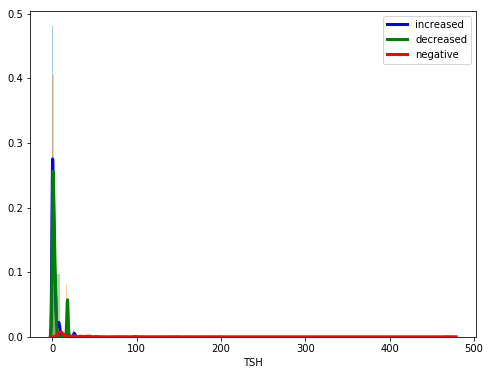

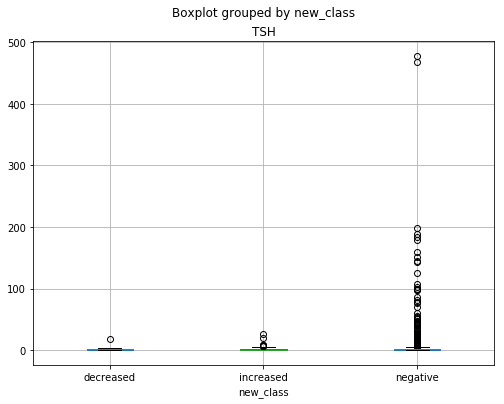

In [35]:
analyze_numeric(other_train,'TSH')

Grafy naznacuju, ze chori ludia maju nizku hodnotu TSH. Podobne, ako v pripade TT4, aj ludia s negativnymi vysledkami maju vacsinou nizku hodnotu, ale su ovela viac rozptyleni, kym chori sa nachadzaju len v uzsom rozsahu

Tiez je velky rozdiel medzi priemerom a medianom, tieto udaje su vychylene, prevazna vecsina udajov je blizkosti 0, v pripade pacientov s negativnym vysledkom sa tato hodnota hybe vo velkom rozsahu, so 2 velmi extremne pripady, mohli by indikovat nepresne merania, alebo inu chybu.

In [36]:
other_train[other_train.TSH > 400]

,Unnamed: 0,name,address,query hyperthyroid,FTI measured,education,lithium,TT4,T4U,capital-loss,capital-gain,tumor,TSH,T3,fnlwgt,hours-per-week,relationship,sick,workclass,TT4 measured,class,marital-status,goitre,native-country,hypopituitary,medical_info,on antithyroid medication,referral source,education-num,occupation,TBG measured,TBG,race,FTI,new_class
723,723,Jaime Reels,"443 Sullivan Springs\nEast Andreaborough, LA 4...",f,t,HS-grad,f,21.0,1.1,0.0,0.0,f,468.0,0.7,170861.0,32.0,Own-child,f,State-gov,t,negative.|3047,Separated,f,United-States,f,"{'query hypothyroid':'f','T4U measured':'t','p...",f,other,9.0,Other-service,f,?,White,19,negative
2110,2110,Geraldine Edwards,"866 Perkins Prairie\nOliviaton, NV 97905",f,t,HS-grad,f,45.0,1.3,0.0,0.0,f,478.0,NaN,172579.0,30.0,Not-in-family,f,Private,t,Negative.|3375,Separated,f,United-States,f,"{'query hypothyroid':'f','T4U measured':'t','p...",f,other,9.0,Other-service,f,?,White,34,negative


"What’s normal can vary depending on a number of factors, including the laboratory where your blood test is done, she adds. A normal range for TSH in most laboratories is 0.4 milliunits per liter (mU/L) to 4.0 mU/L." (zdroj: [https://www.everydayhealth.com/hs/healthy-living-with-hypothyroidism/understanding-test-results/](https://www.everydayhealth.com/hs/healthy-living-with-hypothyroidism/understanding-test-results/))

V pripade deti do 18 rokov tato hodnota moze byt v normalnom pripapde az do 64 mU/L. [https://www.healthline.com/health/tsh-normal-range-by-age](https://www.healthline.com/health/tsh-normal-range-by-age),  

Velmi vychylene hodnoty mozu znamenat pouzitie inych metrik v niektorych pripadoch.

#### T3

In [37]:
other_train.T3.head()

0    1.6
1    2.3
2    1.8
3    2.1
4    1.2
Name: T3, dtype: float64

count    1795.000000
mean        2.023175
std         0.813347
min         0.050000
25%         1.600000
50%         2.000000
75%         2.400000
max        10.600000
Name: T3, dtype: float64


/home/vajk/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/vajk/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/vajk/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


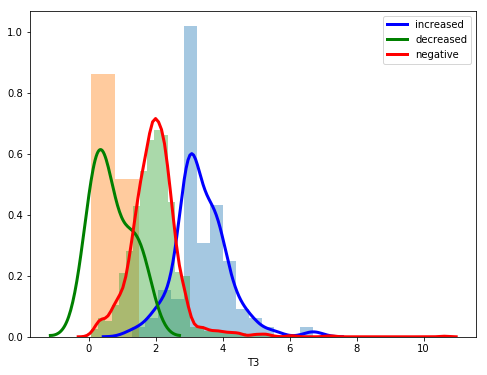

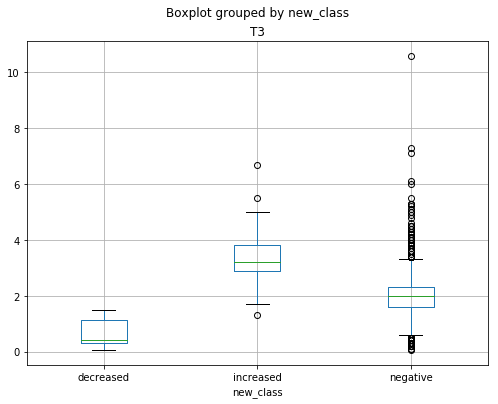

In [38]:
analyze_numeric(other_train,'T3')

Histogram hodnot atrinutu T3 nam ukazuje vychýlenie hodnot chorych pacientov k okrajom. Maximum je velmi odlahla hodnota, pravdepodobne ju nemozeme brat za validnu hodnotu

#### fnlwgt

In [39]:
other_train.fnlwgt.head()

0    127573.0
1    103218.0
2    134181.0
3    195914.0
4    121135.0
Name: fnlwgt, dtype: float64

count    2.282000e+03
mean     1.882513e+05
std      1.092634e+05
min      2.030800e+04
25%      1.179322e+05
50%      1.771505e+05
75%      2.319945e+05
max      1.366120e+06
Name: fnlwgt, dtype: float64


/home/vajk/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/vajk/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/vajk/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


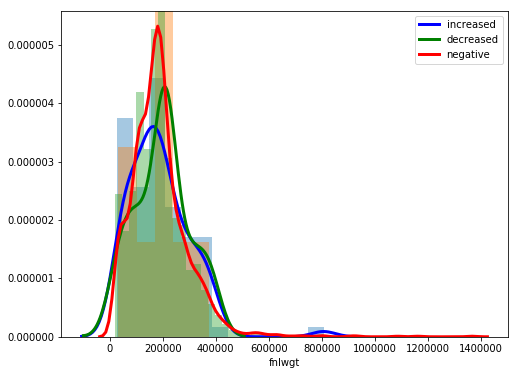

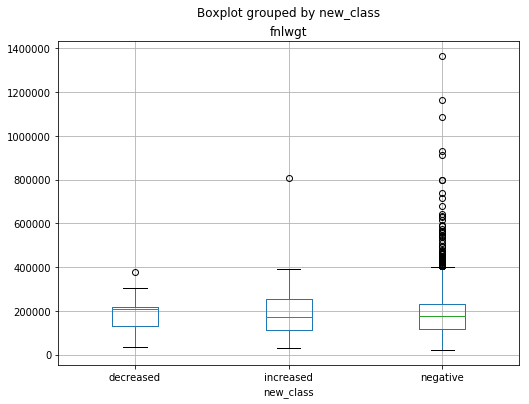

In [40]:
analyze_numeric(other_train,'fnlwgt')

Tento atribut ma velmi podobne rozdelenie v pripade zdravych aj horych, len v pripade negativnych je viacej extremnych hodnot, bez presnejsej interpretacie je tento atribut malo napomocny.

#### education-num

In [41]:
other_train['education-num'].value_counts()

9.0     666
10.0    499
13.0    301
14.0    112
11.0    101
7.0      76
12.0     61
6.0      52
4.0      41
8.0      39
5.0      30
15.0     24
3.0      21
16.0     12
2.0      11
1.0       3
Name: education-num, dtype: int64

Tento atribut sa javi ako kategoricky (analyza nizsie)

#### FTI

In [42]:
other_train.FTI.head()

0     97
1    112
2    112
3     79
4    101
Name: FTI, dtype: object

Tento atribut obsahuje cisla, ale je typu object, su tam hodnoty '?', co pravdepodobne znaci Nan hondotu

In [43]:
other_train['FTI'] = pd.to_numeric(other_train.FTI, errors='coerce')

count    2041.000000
mean      111.201323
std        33.218222
min         2.000000
25%        93.000000
50%       107.000000
75%       125.000000
max       395.000000
Name: FTI, dtype: float64


/home/vajk/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/vajk/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/vajk/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


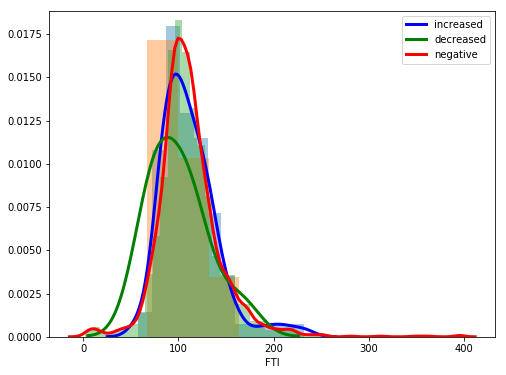

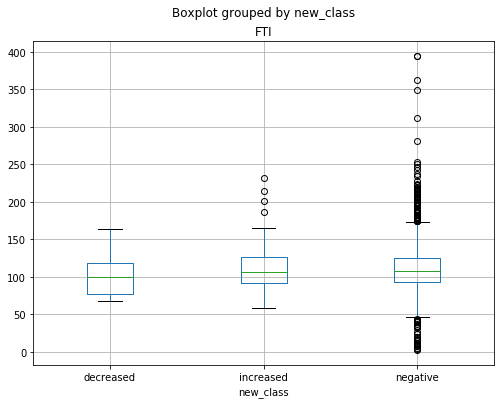

In [44]:
analyze_numeric(other_train,'FTI')

Tento atribút ma takmer rovnake rozdelenie medzi všetkymi pacientami čo nam ukazujú obidva grafy. 

#### Age (dataset 'personal')

In [54]:
personal_train.age.describe()

count    2236.000000
mean       51.822004
std        20.884439
min         1.000000
25%        36.000000
50%        54.000000
75%        67.000000
max       455.000000
Name: age, dtype: float64

In [59]:
personal_train.age.isna().sum()

1

/home/vajk/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


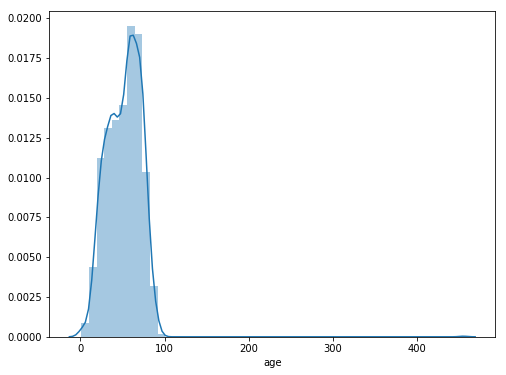

In [58]:
sns.distplot(personal_train.age.dropna())

Atribut age obsahuje vacsinou hodnoty z rozsahu, co priblizne zodpoveda beznemu veku ludi (max do 100 rokov, aj ked aj hodnota okolo 100 sa da brat, ako extrem, ale nie je to nemozna hodnota). Vyrazne extremna hodnota je 455 rokov, co moze byt sposobene napriklad preklepom. Len 1 hodnota nie je zadana

### Kategoricke atributy
Atributy, ktore sa javia, ako kategoricke: 

OTHER: education, education-num, relationship, workclass, marital-status, native-country, referral source, occupation, race

PERSONAL: sex

funkcia na ziskania zakladneho pohladu o atribute:

In [45]:
def analyze_cat(index, col, norm='columns', rename="percentage", title=""):
    table = pd.crosstab(index=index, columns=col,normalize=norm)
    
    stacked = table.stack().reset_index().rename(columns={0: rename})
    
    sns.barplot(x=stacked.iloc[:,0], y=stacked.iloc[:,2], hue=stacked.iloc[:,1])
    plt.title(title)
    plt.xticks(rotation=90)
    return stacked

Táto funkcia vykresľuje normalizovany počet prípadov pripadajúcich danej kategorii.

#### education

In [46]:
other_train.education.unique()

array([' HS-grad', ' Some-college', ' Bachelors', ' 1st-4th', ' 7th-8th',
       ' Masters', ' 10th', ' 11th', ' Doctorate', ' 5th-6th',
       ' Assoc-voc', ' Assoc-acdm', ' 9th', ' 12th', ' Prof-school', nan,
       ' Preschool'], dtype=object)

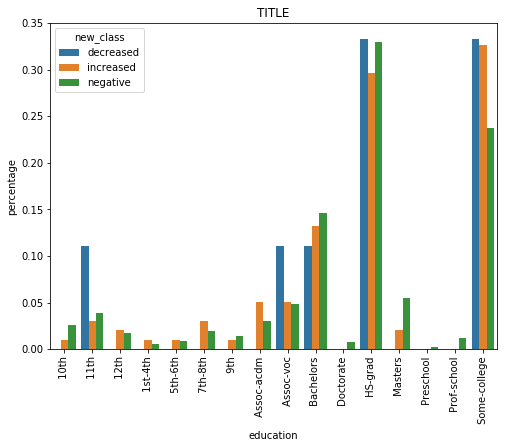

In [49]:
tab = analyze_cat(other_train['education'],other_train['new_class'], title="TITLE")

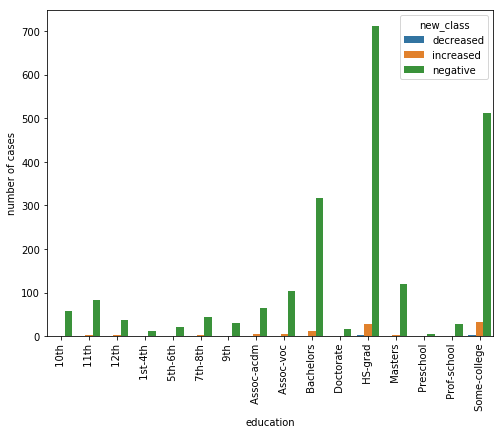

In [61]:
tab = analyze_cat(other_train['education'],other_train['new_class'], norm=False, rename='number of cases')

Graf hore obsahuje normalizovane hodnoty, kym graf dole absolutnu pocetnost ludi v jednotlivych kategoriach. Je vidiet, ze pre niektore kategorie sa chore stavy vyskytuju castejsie, ale moze to byt sposobene malou vzorkou chorych ludi.

#### education-num

In [209]:
other_train.education.unique()

array([' HS-grad', ' Some-college', ' Bachelors', ' 1st-4th', ' 7th-8th',
       ' Masters', ' 10th', ' 11th', ' Doctorate', ' 5th-6th',
       ' Assoc-voc', ' Assoc-acdm', ' 9th', ' 12th', ' Prof-school', nan,
       ' Preschool'], dtype=object)

In [210]:
other_train['education-num'].unique()

array([ 9., 10., 13.,  2., nan,  4., 14.,  6.,  7.,  3., 11., 12.,  5.,
        8., 15., 16.,  1.])

In [212]:
pd.crosstab(index = other_train['education'],columns = other_train['education-num'])

education-num,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0
education,,,,,,,,,,,,,,,,
10th,0,0,0,0,0,52,0,0,0,0,0,0,0,0,0,0
11th,0,0,0,0,0,0,76,0,0,0,0,0,0,0,0,0
12th,0,0,0,0,0,0,0,39,0,0,0,0,0,0,0,0
1st-4th,0,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5th-6th,0,0,21,0,0,0,0,0,0,0,0,0,0,0,0,0
7th-8th,0,0,0,41,0,0,0,0,0,0,0,0,0,0,0,0
9th,0,0,0,0,30,0,0,0,0,0,0,0,0,0,0,0
Assoc-acdm,0,0,0,0,0,0,0,0,0,0,0,61,0,0,0,0
Assoc-voc,0,0,0,0,0,0,0,0,0,0,101,0,0,0,0,0


Na zaklade tabulky vieme s urcitostou povedat ze atributy education su namapovane do education-num. V tabuľke vidíme že v každom riadku má len jedna dvojica atrinutov nejaku hodnotu a ostatné su nula, to znamena že dana kategoria pripada len tomuto číslu.  

#### relationship

In [213]:
other_train.relationship.unique()

array([' Not-in-family', ' Unmarried', ' Other-relative', ' Own_child',
       ' Husband', ' Wife', ' Own-child', nan, ' Not_in_family',
       ' Other_relative'], dtype=object)

Viacslovne hodnoty sa opakuju len su spojene s '-' alebo s '_', preto je potrebne ich odstraniť alebo nahradiť rovnakym znakom.

In [64]:
other_train['relationship'] = other_train.relationship.replace(r'[-_]',' ', regex=True)

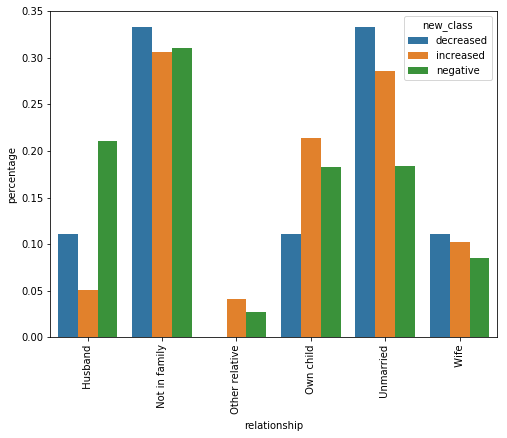

In [65]:
tab = analyze_cat(other_train['relationship'],other_train['new_class'])

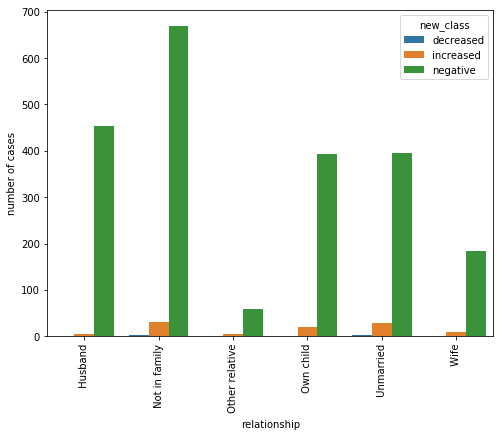

In [66]:
tab = analyze_cat(other_train['relationship'],other_train['new_class'], norm = False, rename = 'number of cases')

Podobne, ako v pripade education nemozeme sa uplne spoliehat na rozdiely, ktore su v grafe, lebo pocet chorych je vyrazne mensi, ako pocet zdravych. Napriek tomu to z grafov vyzera tak, ze pre niektore kategorie (ako 'Own child', 'unmaried' a 'Not in family') je vyskyt ludi so zvysenou hodnotou proteinov vacsi

#### workclass

In [67]:
other_train.workclass.unique()

array([' Private', ' Local-gov', ' ?', ' State-gov', ' Self-emp-not-inc',
       ' Federal-gov', ' Self-emp-inc', nan, ' Without-pay'], dtype=object)

hodnota '?' moze byt nahradena hodnotou nan

In [68]:
other_train['workclass'] = other_train.workclass.replace(r' \?',np.nan, regex=True)

In [69]:
other_train.workclass.unique()

array([' Private', ' Local-gov', nan, ' State-gov', ' Self-emp-not-inc',
       ' Federal-gov', ' Self-emp-inc', ' Without-pay'], dtype=object)

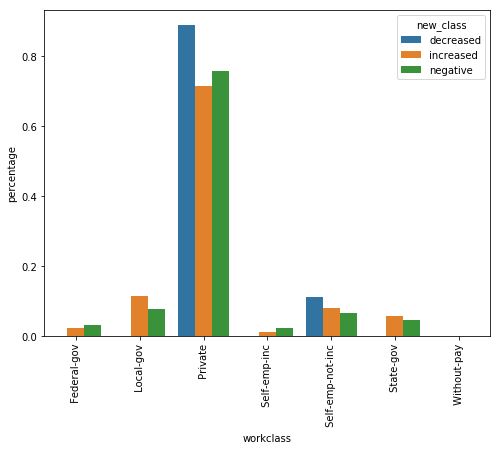

In [72]:
tab = analyze_cat(other_train.workclass,other_train.new_class)

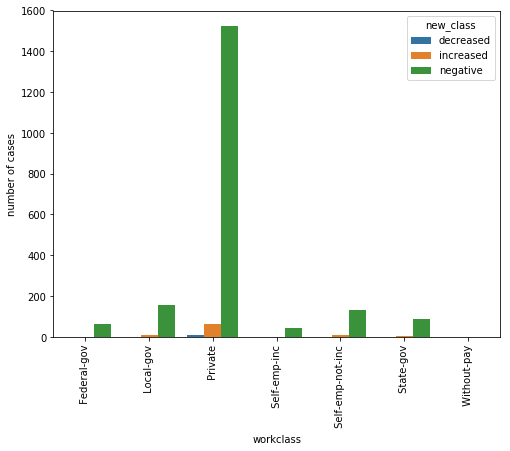

In [75]:
tab = analyze_cat(other_train.workclass,other_train.new_class, norm=False, rename='number of cases')

Celkova vacsina ludi pracuje v sukromnom sektore, mozno aj tym je sposobene, ze vacsina chorych je z tejto skupiny, na prvy pohlad nie je mozne najst vyrazny suvis medzi chorobou a tymito kategoriami prace

#### marital-status

In [221]:
other_train['marital-status'].unique()

array([' Separated', ' Divorced', ' Never-married', ' Married-civ-spouse',
       ' Married-spouse-absent', ' Widowed', nan], dtype=object)

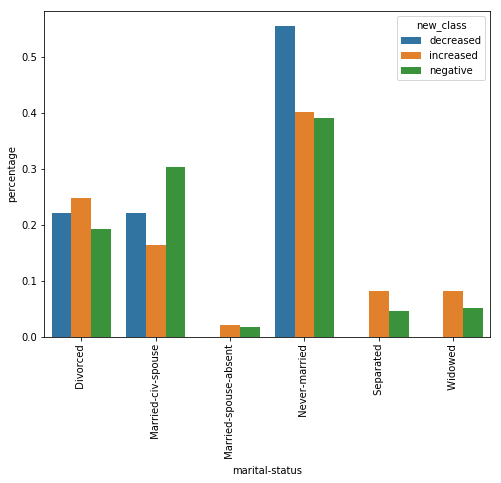

In [77]:
tab = analyze_cat(other_train['marital-status'],other_train['new_class'])

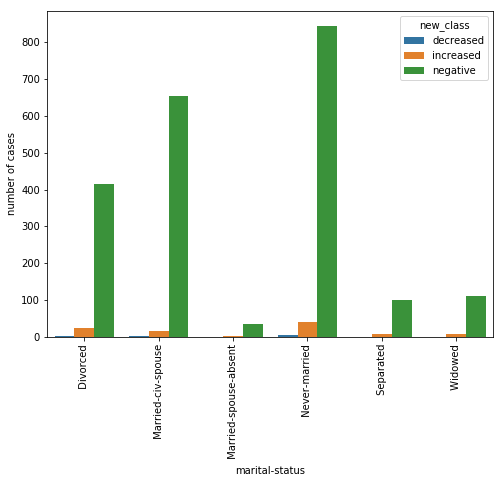

In [78]:
tab = analyze_cat(other_train['marital-status'],other_train['new_class'], norm=False, rename='number of cases')

Aj v tomto pripade moze znamenat problem, ze negativnych pacientov je ovela viac. Grafy naznacuju, ze najvacsi pocet chorych je zo skupiny 'Never-married'

#### native-country

In [47]:
other_train['native-country'].unique()

array([' United-States', ' China', nan, ' Italy', ' Haiti', ' Peru',
       ' Iran', ' Mexico', ' Columbia', ' Nicaragua', ' Poland',
       ' Canada', ' ?', ' Ecuador', ' Laos', ' Cuba', ' Puerto-Rico',
       ' Ireland', ' Vietnam', ' England', ' Germany',
       ' Dominican-Republic', ' Jamaica', ' Taiwan', ' Philippines',
       ' Hong', ' Honduras', ' Guatemala', ' India', ' South',
       ' El-Salvador', ' France', ' Thailand', ' Greece', ' Japan',
       ' Scotland', ' Outlying-US(Guam-USVI-etc)', ' Portugal'],
      dtype=object)

'?' moze byt nahradeny s Nan

In [48]:
other_train['native-country'] = other_train['native-country'].replace(r' \?',np.nan, regex=True)

In [49]:
other_train['native-country'].value_counts().head(15)

 United-States    2040
 Mexico             33
 Germany            16
 Philippines        12
 Italy              10
 Jamaica             8
 Columbia            8
 Vietnam             7
 Canada              6
 Puerto-Rico         6
 England             6
 Cuba                5
 El-Salvador         5
 Poland              5
 Taiwan              4
Name: native-country, dtype: int64

Drtiva vacsina ludi je zo Spojenych Statov, analyza na zaklade tohto atributu nie je uplne relevantna, lebo nie je dostatocne velka vzorka z ostatnych krajin

#### referral source

In [50]:
other_train['referral source'].unique()

array(['SVI', 'other', 'SVHC', 'STMW', 'SVHD', nan], dtype=object)

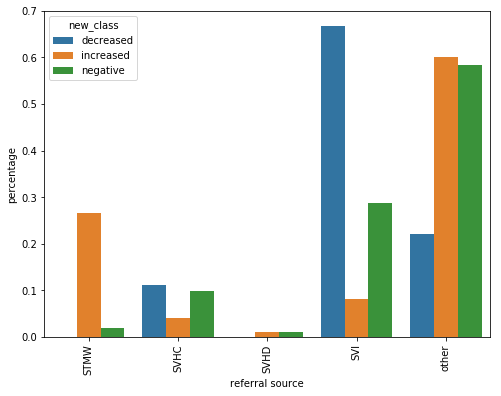

In [227]:
tab = analyze_cat(other_train['referral source'],other_train.new_class)

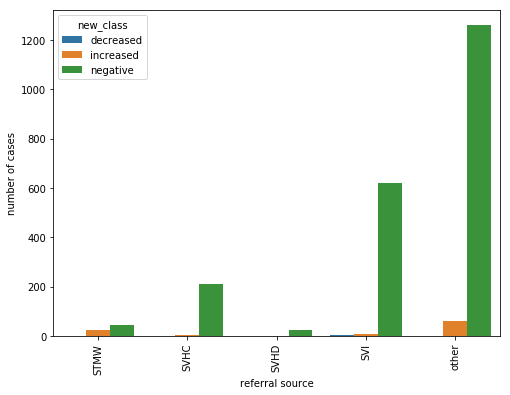

In [52]:
tab = analyze_cat(other_train['referral source'],other_train.new_class, norm=False, rename='number of cases')

Velka vacsina ludi je z kategorie 'other', preto je tu aj najviac ludi so zvysenou hodnotou proteinov. Znizene hodnoty sa vobec nevyskytuju v pripadoch 'STMW' a 'SVHD', ale toto moze byt sposobene celkovym nizkym poctom ludi so znizenou hladinou danych proteinov

#### occupation

In [53]:
other_train.occupation.unique()

array([' Adm-clerical', ' Handlers-cleaners', ' Sales', ' ?',
       ' Other-service', ' Exec-managerial', ' Farming-fishing',
       ' Prof-specialty', ' Craft-repair', ' Tech-support',
       ' Machine-op-inspct', ' Transport-moving', nan, ' Protective-serv',
       ' Priv-house-serv'], dtype=object)

Aj v tomto pripade pravdepodobne '?' znamena nezadanu hodnotu

In [56]:
other_train['occupation'] = other_train['occupation'].replace(r' \?',np.nan, regex=True)

In [57]:
other_train.occupation.unique()

array([' Adm-clerical', ' Handlers-cleaners', ' Sales', nan,
       ' Other-service', ' Exec-managerial', ' Farming-fishing',
       ' Prof-specialty', ' Craft-repair', ' Tech-support',
       ' Machine-op-inspct', ' Transport-moving', ' Protective-serv',
       ' Priv-house-serv'], dtype=object)

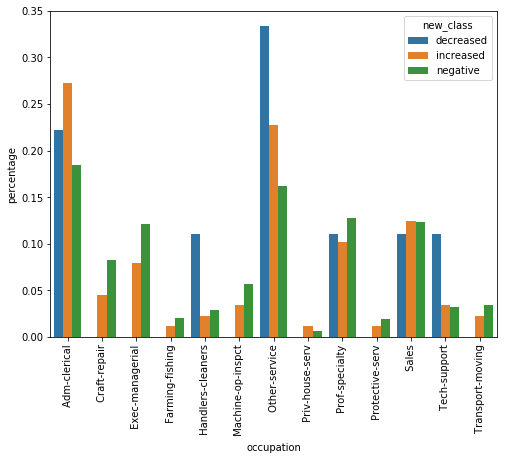

In [59]:
tab = analyze_cat(other_train['occupation'], other_train.new_class)

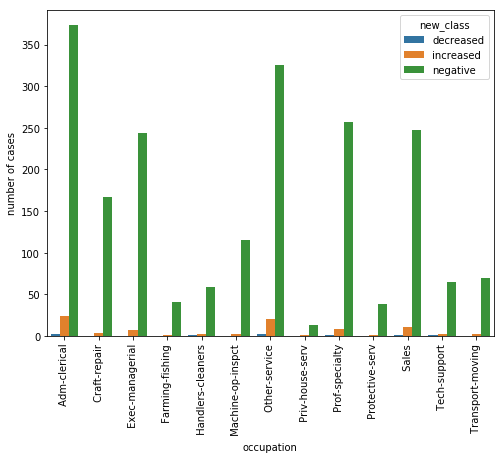

In [60]:
tab = analyze_cat(other_train['occupation'], other_train.new_class, norm=False, rename='number of cases')

Z grafov je vidno, ze v kategorii 'Adm-clerical' a 'Other-service' je najvacsi pocet chorych ludi, ale zaroven tieto su kategoria s najvacsim poctom ludi, preto vysledok moze byt skresleny

#### race

In [232]:
other_train.race.unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       nan, ' Other'], dtype=object)

In [233]:
other_train.race.value_counts()

 White                 1897
 Black                  274
 Asian-Pac-Islander      66
 Other                   22
 Amer-Indian-Eskimo      19
Name: race, dtype: int64

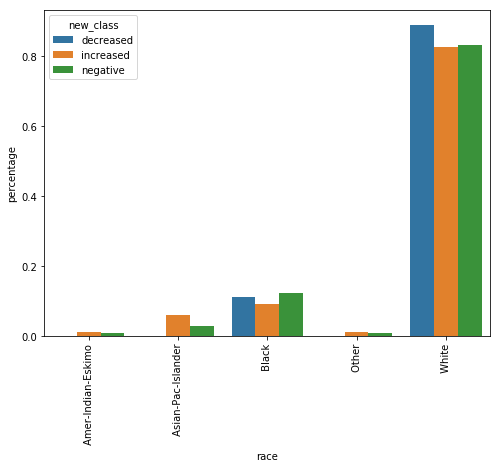

In [61]:
tab = analyze_cat(other_train['race'],other_train['new_class'])

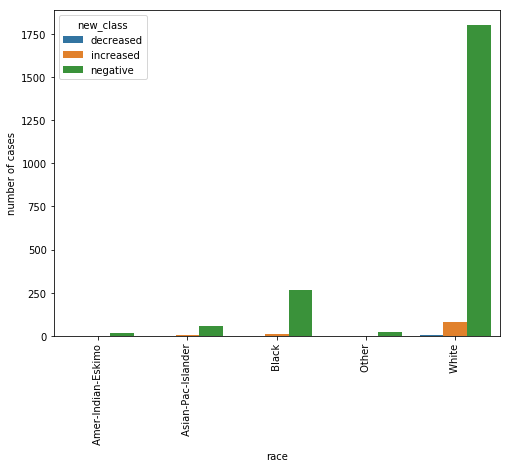

In [62]:
tab = analyze_cat(other_train['race'],other_train['new_class'], norm=False, rename='number of cases')

Vacsina sledovanych ludi je z bielej rasy, preto tento atribut nie je relevantny, lebo z ostatnych ras je mala vzorka. Avšak môžme si všimnuť že pri niektorych kategoriach nefiguruju žiadne "decreased" prípady, to samozrejme může byt sposobene nizkym počtom tychto pripadov.  

#### sex (dataset 'personal')

In [64]:
personal_train.sex.unique()

array(['F', 'M', '?'], dtype=object)

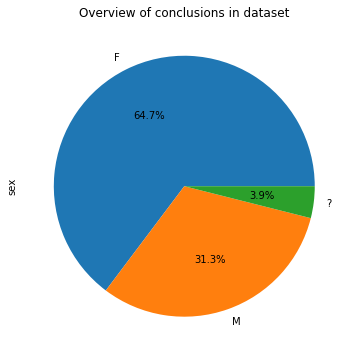

In [66]:
personal_train.sex.value_counts().plot.pie(autopct='%1.1f%%', title = "Overview of conclusions in dataset")

skoro 2/3 skumanych osob boli zeny, a prblizne dalsia tretina su muzi a ludia bez urceneho pohlavia

### Textove atributy

dataset OTHER: name, address, medical_info

dataset PERSONAL: name, address

#### medical_info

In [236]:
other_train.medical_info[1]

"{'query hypothyroid':'f','T4U measured':'t','pregnant':'f','thyroid surgery':'f','TSH measured':'t','query on thyroxine':'f','I131 treatment':'f','on thyroxine':'f','T3 measured':'t','psych':'f'}"

Stlpec medical_info obsahuje v sebe viacere stlpce, ktore mozu obsahovat pomocnu informaciu (napriklad 'pregnant', 'psych' alebo 'I131 treatment'), tieto hodnoty bude potrebne rozdelit do viacerych stlpcov

In [89]:
def convert(df,column):
    for index,row in enumerate(df[column]):
        if type(row) != float:
            d = json.loads(row.replace("'", "\""))
            for key,val in d.items():
                df.loc[index,key] = val
            
    return df

In [100]:
other_train = convert(other_train,"medical_info")

**atribut pregnant**

In [101]:
other_train.pregnant.unique()

array(['f', 't', nan, 'f.4'], dtype=object)

odstranime duplikatne hodnoty

In [103]:
set_true_false(other_train,'pregnant')

In [104]:
other_train.pregnant.unique()

array(['f', 't', nan], dtype=object)

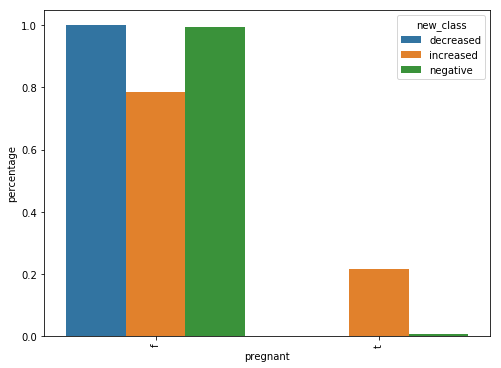

In [105]:
tab = analyze_cat(other_train['pregnant'],other_train['new_class'])

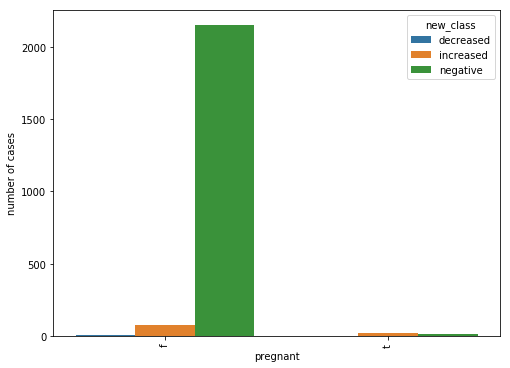

In [106]:
tab = analyze_cat(other_train['pregnant'],other_train['new_class'], norm=False, rename='number of cases')

Grafy naznacuju, ze tehotne zeny maju s vacsou pravdepodobnostou zvysene hodnoty, a znizene sa nevyskytuje vobec. Aj v tomto pripade ale plati, ze vysledok je skresleny, lebo vacsina sledovanych ludi nie su tehotny

**atribut I131 treatment** 

In [108]:
other_train['I131 treatment'].unique()

array(['f', 't', nan, 'f.6'], dtype=object)

spojime duplicitne hodnoty

In [109]:
set_true_false(other_train,'I131 treatment')

In [110]:
other_train['I131 treatment'].unique()

array(['f', 't', nan], dtype=object)

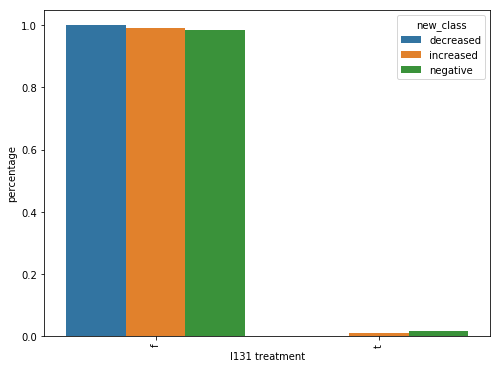

In [111]:
tab = analyze_cat(other_train['I131 treatment'],other_train['new_class'])

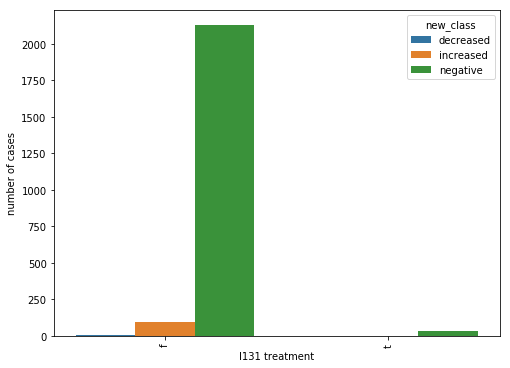

In [112]:
tab = analyze_cat(other_train['I131 treatment'],other_train['new_class'], norm=False, rename='number of cases')

Tuto liecbu postupovali len ludia s negativnymi vysledkami, alebo ludia so zvysenou hladinou danych proteinov. Najvacsie percento chorych ale liecbu nepodstupilo

**atribut psych**

In [113]:
other_train.psych.unique()

array(['f', 't', nan, 'f.13'], dtype=object)

In [114]:
set_true_false(other_train,'psych')

In [115]:
other_train.psych.unique()

array(['f', 't', nan], dtype=object)

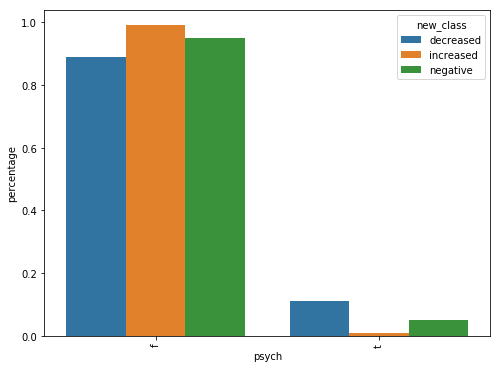

In [117]:
tab = analyze_cat(other_train['psych'],other_train['new_class'])

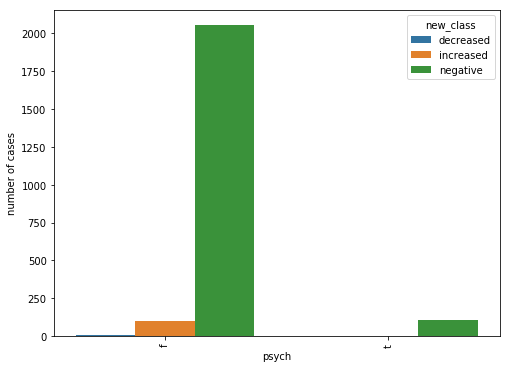

In [118]:
tab = analyze_cat(other_train['psych'],other_train['new_class'], norm=False, rename='number of cases')

Aj tento atribut obsahuje velmi nizky pocet kladnych hodnot, preto nema velku vypovednu hodnotu

### Name - Address

Tieto dva atributy sa javia ako identifikatori pacienta.

#### name (dataset 'other')

In [237]:
other_train.name.count()

2287

In [238]:
(other_train.name.value_counts() > 1).sum()

50

Vieme že 50 mien sa vyskytuje v zaznamoch aspon dvakrat, problemom moze byt urcit, ci sa jedna o toho isteho cloveka.

#### name (dataset 'personal')

In [119]:
(personal_train.name.value_counts() > 1).sum()

1

Zistili sme že mena pacientov nie su originálne (co moze znmenat viacej zaznamov toho istaho pacienta, ale aj viacej ludi s rovnakym menom), čo je problém pri spájani tabuliek. Pre unikátnu identifikáciu pacienta potrebujeme k menu pridať kombinaciu ineho jeho atributu, čo môže byť jeho adresa.

#### address (dataset 'other')

In [239]:
other_train.address[0]

'340 Moon Freeway\nTamarafort, MO 35449'

In [240]:
(other_train.address.value_counts() > 1).sum()

49

49 adries sa vyskytuje viackrat, v konbinacii s menom mozu pomerne spolahlivo urcovat jednotlive osoby (s vynimkou, ked napriklad syn a otec maju rovnake meno a byvaju na jednej adrese atd.).

#### adress (dataset 'personal')

In [120]:
personal_train.address[0]

'11818 Lori Crossing Apt. 802\nPughstad, DC 78165'

format adries je rovnake pre oba datasety

In [122]:
(personal_train.address.value_counts() > 1).sum()

0

Tento dataset obsahuje len unikatne adresy, na zaklade nich by sa dali urcit unikatni pacienti

In [127]:
other_name_address = other_train.name + other_train.address
personal_name_address = personal_train.name + personal_train.address

In [128]:
other_name_address.nunique()

2237

In [129]:
personal_name_address.nunique()

2237

In [126]:
personal_train.shape[0]

2237

V datasete 'personal' vieme identifikovat kazdeho cloveka konbinaciou mane a adresy. V datasete other sa vyskytuje 2237 roznych ludi (konbinacia meno-adresa), co sa zhoduje s poctom unikatnych ludi v personal. Na zaklade toho dokazeme na kazdy zaznam v datasete other namapovat osobne udaje z datasetu personal

### Hladanie suvislosti medzi dvojicou spojitych atributov

In [131]:
other_train.columns

Index(['Unnamed: 0', 'name', 'address', 'query hyperthyroid', 'FTI measured',
       'education', 'lithium', 'TT4', 'T4U', 'capital-loss', 'capital-gain',
       'tumor', 'TSH', 'T3', 'fnlwgt', 'hours-per-week', 'relationship',
       'sick', 'workclass', 'TT4 measured', 'class', 'marital-status',
       'goitre', 'native-country', 'hypopituitary', 'medical_info',
       'on antithyroid medication', 'referral source', 'education-num',
       'occupation', 'TBG measured', 'TBG', 'race', 'FTI', 'new_class',
       'query hypothyroid', 'T4U measured', 'pregnant', 'thyroid surgery',
       'TSH measured', 'query on thyroxine', 'I131 treatment', 'on thyroxine',
       'T3 measured', 'psych'],
      dtype='object')

Tie atributy, ktore naznacuju hodnotu merani by mohli byt napomocne pri urcovani, ci vysledky na chorobu budu celkovo negativne. Najprv sa pozrieme na korelaciu medzi ciselnymi atributmi

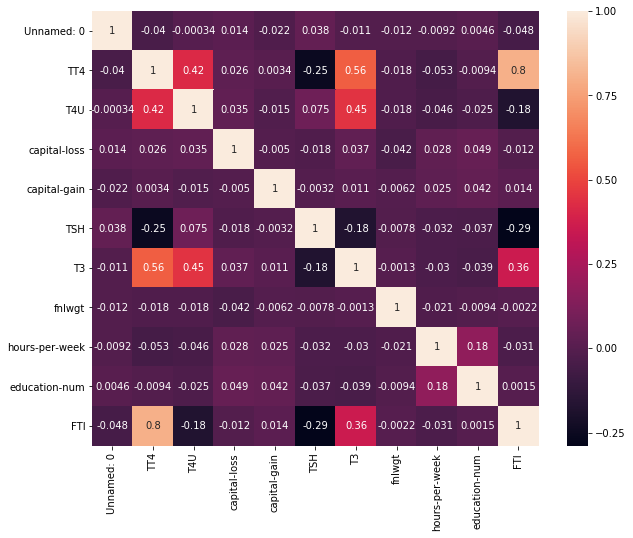

In [135]:
corr = other_train.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True)

Z heatmap je vidno, ze atributy TT4 a T3 ako aj atributy TT4 a FTI maju vysoku kladnu korelaciu nad 0.5

/home/vajk/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/vajk/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


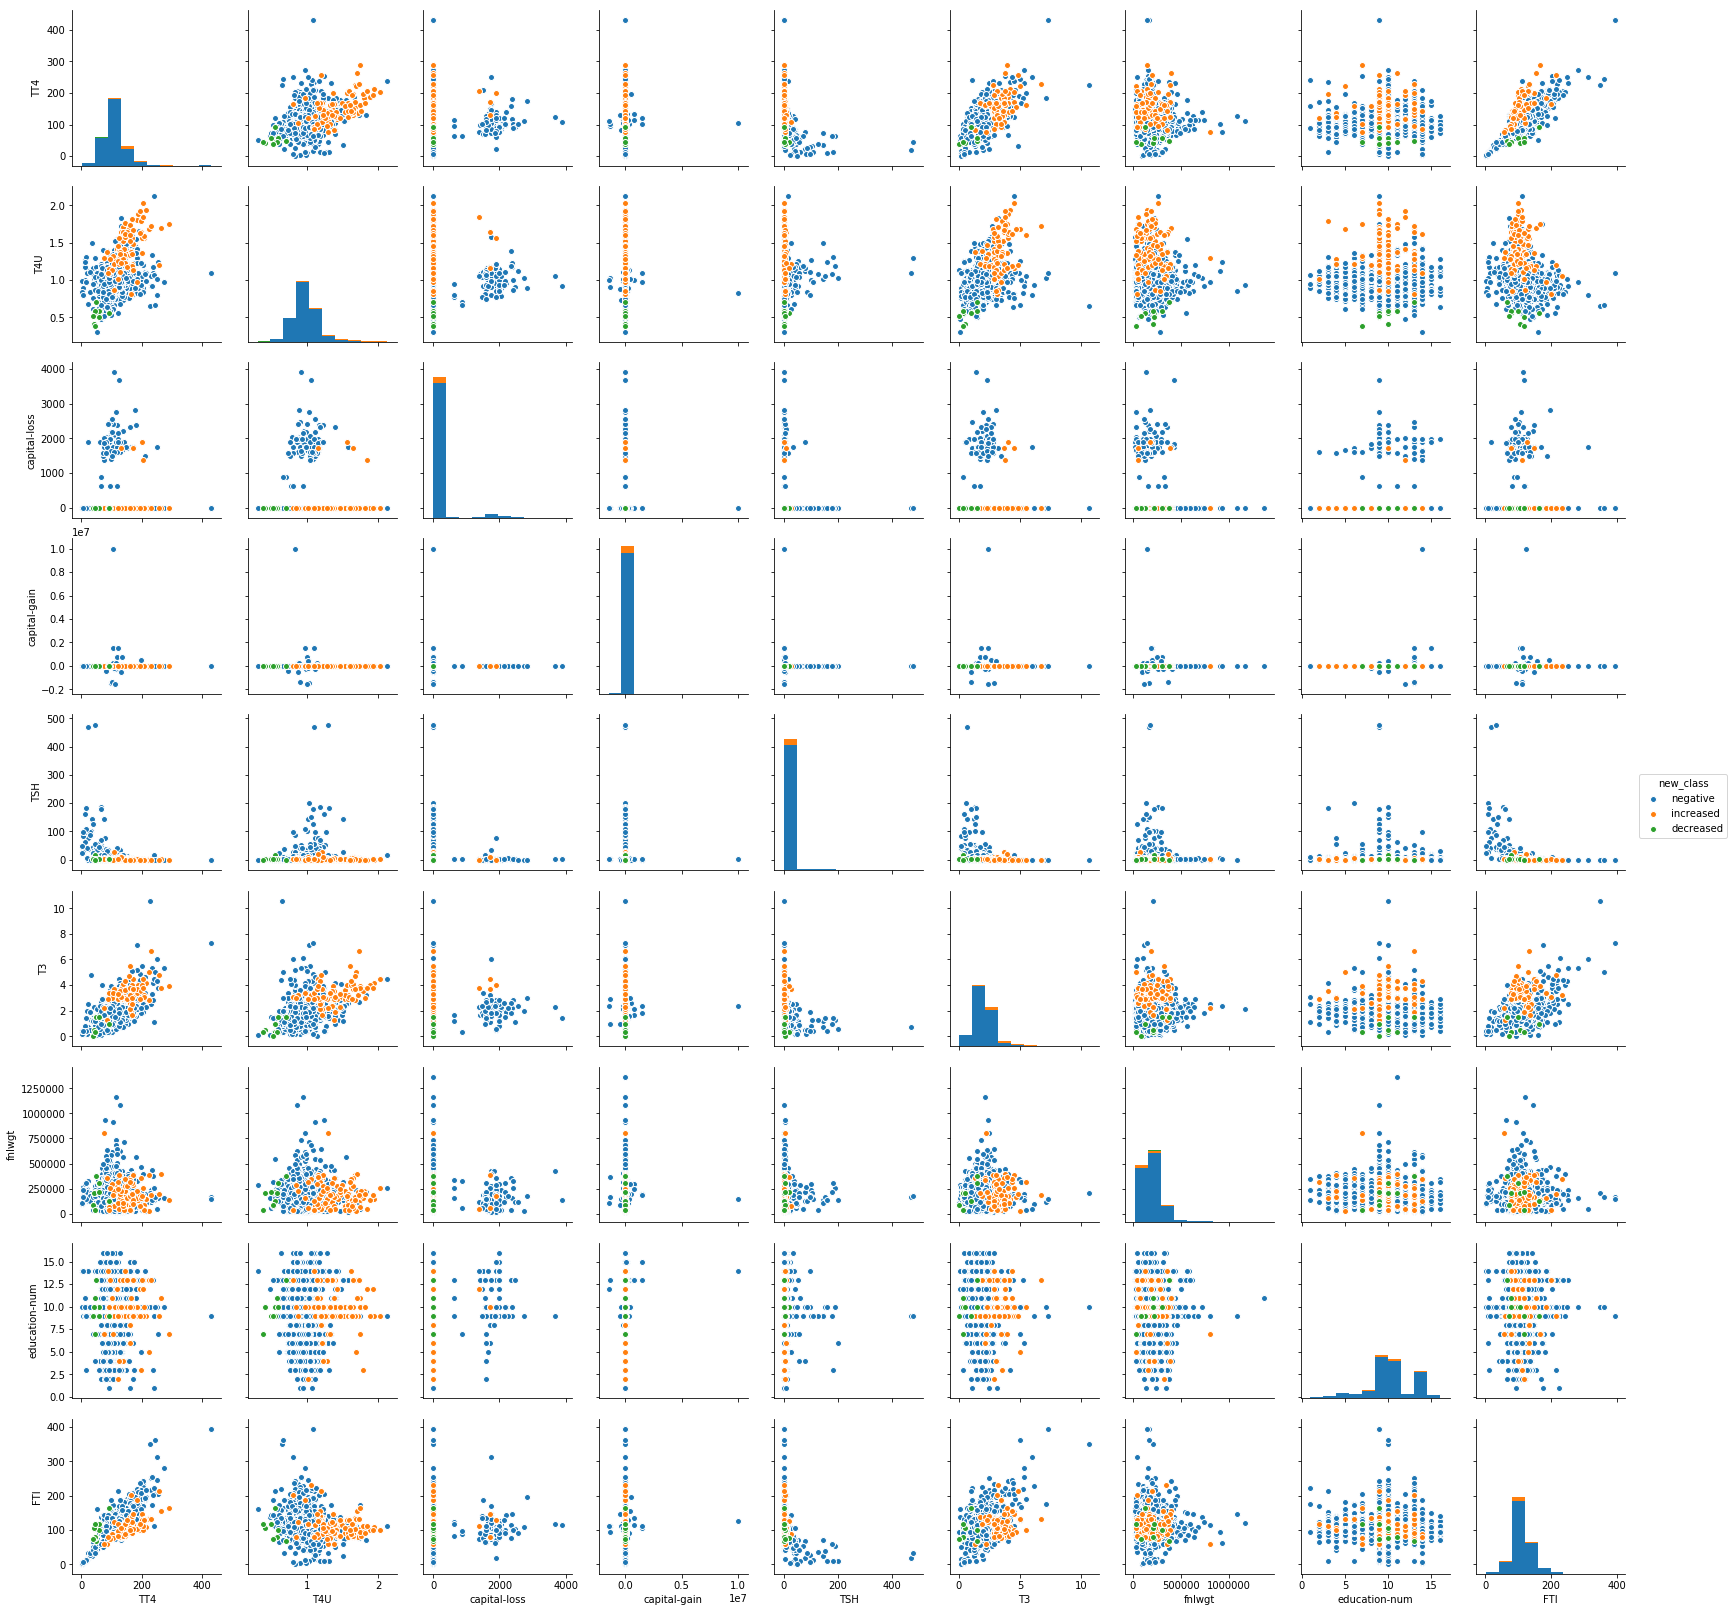

In [138]:
sns.pairplot(other_train, vars=['TT4','T4U', 'capital-loss', 'capital-gain', 'TSH', 'T3', 'fnlwgt', 'education-num', 'FTI'], hue='new_class')

Vztah FTI a TT4 podla grafu su do nejakej mieri (linearne) zavisle. Rovnako vztah TT4 a T3. 
Tieto dvojicky podla grafov maju moderovanu kladnu korelaciu

### suvislosti kategoricky-kategoricky

In [141]:
other_train.columns

Index(['Unnamed: 0', 'name', 'address', 'query hyperthyroid', 'FTI measured',
       'education', 'lithium', 'TT4', 'T4U', 'capital-loss', 'capital-gain',
       'tumor', 'TSH', 'T3', 'fnlwgt', 'hours-per-week', 'relationship',
       'sick', 'workclass', 'TT4 measured', 'class', 'marital-status',
       'goitre', 'native-country', 'hypopituitary', 'medical_info',
       'on antithyroid medication', 'referral source', 'education-num',
       'occupation', 'TBG measured', 'TBG', 'race', 'FTI', 'new_class',
       'query hypothyroid', 'T4U measured', 'pregnant', 'thyroid surgery',
       'TSH measured', 'query on thyroxine', 'I131 treatment', 'on thyroxine',
       'T3 measured', 'psych'],
      dtype='object')

In [142]:
crosst = pd.crosstab(index=other_train['sick'], 
                           columns=other_train["tumor"])
crosst

tumor,f,t
sick,,
f,2121,53
t,88,1


### suvislost kategoricky-spojity

In [146]:
def fu():
    for v in true_false_cols:
        yield sns.boxplot(v, 'T4U', data=other_train)

In [147]:
f = fu()

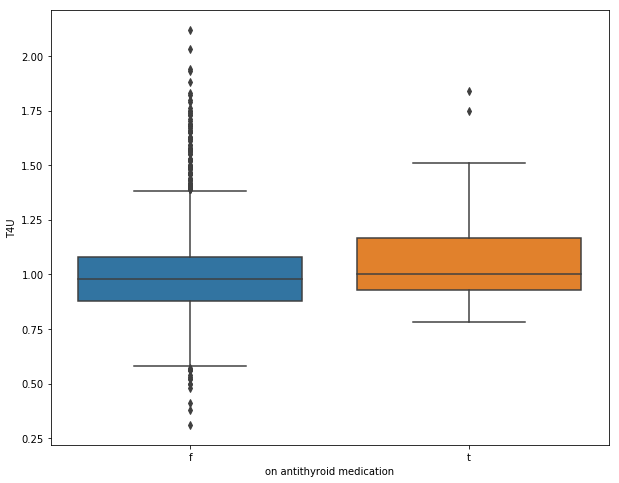

In [148]:
next(f)

### Formulacia a overenie hypotez o datach

#### Hypoteza 1

Pacienti s nizsimi hodnotami TT4 su klasifikovani ako decreased cize chori.

In [ ]:
sn.boxplot(x='new_class', y='TT4', data=other_train[other_train['new_class'] != 'increased'])

In [ ]:
negative = other_train.loc[other_train['new_class'] == 'negative','TT4'].dropna()

In [ ]:
decreased = other_train.loc[other_train['new_class'] == 'decreased','TT4'].dropna()

In [ ]:
sn.distplot(negative)

In [ ]:
sn.distplot(decreased)

In [ ]:
def identify_outliers(a):
    lower = a.quantile(0.25) - 1.5 * stats.iqr(a)
    upper = a.quantile(0.75) + 1.5 * stats.iqr(a)
    
    return a[(a > upper) | (a < lower)]

In [ ]:
dec_out = identify_outliers(decreased)
decreased = decreased.drop(dec_out.index)

In [ ]:
sn.distplot(decreased)

In [ ]:
neg_out = identify_outliers(negative)
negative = negative.drop(neg_out.index)

In [ ]:
_ = sm.ProbPlot(negative, fit=True).qqplot(line='45')

In [ ]:
_ = sm.ProbPlot(decreased, fit=True).qqplot(line='45')

In [ ]:
stats.shapiro(negative)

In [ ]:
stats.shapiro(decreased)

In [ ]:
stats.mannwhitneyu(negative, decreased)

In [ ]:
sms.DescrStatsW(negative).tconfint_mean()

In [ ]:
sms.DescrStatsW(decreased).tconfint_mean()

In [ ]:
sn.barplot(x='new_class', y='TT4', data=other_train[other_train['new_class'] != 'increased'], 
            capsize=0.1, errwidth=2, palette=sn.color_palette("Blues"))

#### Hypoteza 2

### Identifikacia problemov a navrh ich riesenia

1. Stlpce, kde su True False hodnoty maju viacere znacenie (t, True, f, false, False atd...) => treba zjendotit a zredukovat na dve hodnoty (+Nan)
2. Stlpec 'medical info' obsahuje v sebe viacere stlpce => bude treba rozdelit
3. V age je nerealna hodnota az 400 rokov 
4. V stlpci class su jednotlive katogorie namiesane s cislami a su aj v inom tvare, treba z nich extrahovat len potrebnu informaciu 4i je negative, increased alebo decreased.